### Solar System Live
#### Plot planets around Sun
Watch where planets are around Sun
#### Get Geocentric positions
The Sun, the planets, the nano planets, our Moon and 1 Centaur


In [1]:
import matplotlib.pyplot as plt
# import math
import datetime
import solarsystem
# import planetview
# from libraries.planetview import solarsystem

#### No need to edit any variable to watch Solar System Live
* Editing date elements below can output positions for the given time
* Edit date elements below if you wish to see where planets will be or where they have been

In [2]:
now    = datetime.datetime.utcnow()
now    = datetime.datetime.now(datetime.timezone.utc)
year   = now.year
month  = now.month
day    = now.day
hour   = now.hour
minute = now.minute
# As this is UTC time we set UT to 0
UT     = 0
# if (datetime.datetime.now(datetime.timezone.utc).dst())==None:
#     dst=0
# else:
#     dst=1
dst = 0

print(year, month, day, hour, minute, UT, dst)

2020 1 23 10 32 0 0


In [3]:
# planet position output be in horizontal coordinates (longitude, latitude, distance from sun in AU)
view='horizontal'

In [4]:
H = solarsystem.Heliocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, view=view )

In [5]:
planets=H.planets()
distances=[]
print('Planet', '   \t','Longitude', '  \t','Latitude', '   \t','Distance')
print('-------------------------------------------------------------------')
for key in planets:
    distances.append(planets[key][2])
    elements = planets[key]
    print(key, '   \t',round(elements[0],2), '  \t',round(elements[1],2), '   \t',round(elements[2],2))
print()
print('Distance is in AU')

Planet    	 Longitude   	 Latitude    	 Distance
-------------------------------------------------------------------
Mercury    	 333.39   	 -6.77    	 0.39
Venus    	 40.25   	 -2.03    	 0.72
Earth    	 57.12   	 0.0    	 0.98
Mars    	 225.07   	 0.15    	 1.56
Jupyter    	 277.91   	 0.06    	 5.22
Saturn    	 293.18   	 0.02    	 10.05
Uranus    	 35.59   	 359.52    	 19.81
Neptune    	 348.15   	 -1.04    	 29.91
Pluto    	 292.86   	 359.3    	 33.89
Ceres    	 295.02   	 -6.05    	 2.93
Chiron    	 4.53   	 2.92    	 18.81
Eris    	 23.56   	 -11.73    	 95.99

Distance is in AU


In [6]:
Hr = solarsystem.Heliocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, view='rectangular' )
planetspositionsHrect=Hr.planets()
# planetspositionsHrect

In [7]:
forplot=[]
planetname=[]
for key in planetspositionsHrect:
    planetname.append(key)
    forplot.append(   planetspositionsHrect[key] )

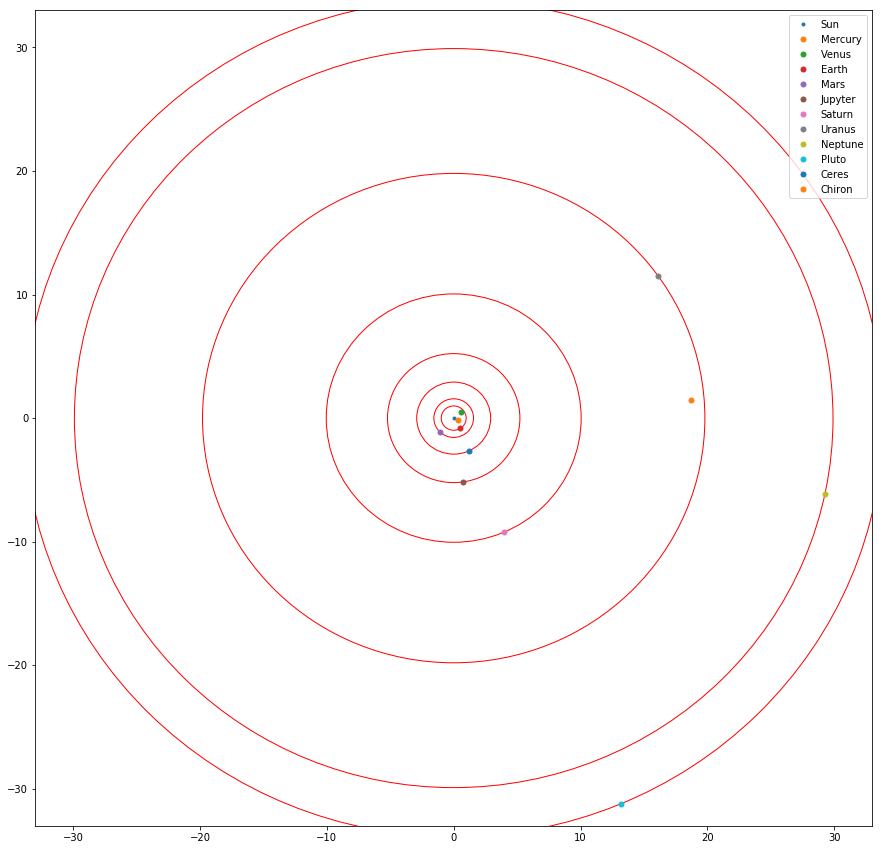

In [8]:
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.cla() # clear things for fresh plot
# ax.set_xlim((-6, 6))
# ax.set_ylim((-6, 6))
ax.set_xlim((-33, 33))
ax.set_ylim((-33, 33))
a=0.5
ax.plot(0,0,'.', label='Sun') 
for i in range(11):
    ax.plot(forplot[i][0] , forplot[i][1] ,'.', markersize=10, label=planetname[i]) 
    if (i >1) & (i < 10):
        ax.add_artist(plt.Circle((0, 0), ((abs(forplot[i][0])**2+abs(forplot[i][1])**2)**0.5), color='r', fill=False))
ax.legend()
plt.show()

In [9]:
Geq = solarsystem.Geocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, plane='equatorial')
Geqp=Geq.position()


print('Object','    \t','Right Ascension','\t','Declination','\t','Distace in AU')
print('-----------------------------------------------------------------------')
for i in Geqp:
    print(i,'    \t',solarsystem.demical2hms(Geqp[i][0]),'     \t',
          solarsystem.demical2arcs(Geqp[i][1]),'\t',round(Geqp[i][2],2))
    

Object     	 Right Ascension 	 Declination 	 Distace in AU
-----------------------------------------------------------------------
Sun     	 20h 20m 39s      	 -19° 30.81' 	 0.98
Mercury     	 20h 57m 38s      	 -19° 16.07' 	 1.33
Venus     	 22h 54m 24s      	 -8° 21.82' 	 1.14
Mars     	 16h 48m 48s      	 -22° 18.7' 	 2.02
Jupyter     	 18h 51m 17s      	 -22° 51.57' 	 6.13
Saturn     	 19h 43m 41s      	 -21° 16.73' 	 11.02
Uranus     	 2h 2m 50s      	 11° 58.2' 	 19.78
Neptune     	 23h 13m 10s      	 -6° 8.03' 	 30.61
Pluto     	 19h 40m 24s      	 -22° 7.68' 	 34.86
Ceres     	 20h 0m 2s      	 -25° 12.44' 	 3.91
Chiron     	 0h 2m 39s      	 3° 23.47' 	 19.3
Eris     	 1h 42m 16s      	 -1° 57.83' 	 96.15


In [10]:
# Greenwich, England Coordinates
longtitude = 0
latitude   = 51.5

moon = solarsystem.Moon(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, longtitude=longtitude, latitude=latitude, topographic=True)
moon_position = moon.position()

In [11]:
moon_position

(285.8990588853162, -1.1408058379408157, 61.220111713627034)

In [12]:
moon_position_eq=solarsystem.spherical_ecliptic2equatorial(moon_position[0],moon_position[1],moon_position[2],H.oblecl)

In [13]:
moon_position_eq

(287.39388425229856, -23.622670745653487, 61.220111713627034)

In [14]:
print('Object','\t','Right Ascension','\t','Declination','\t','Distace in Earth Radius')
print('Moon','\t',solarsystem.demical2hms(moon_position_eq[0]),'     \t',
      solarsystem.demical2arcs(moon_position_eq[1]) ,'\t',moon_position_eq[2])

Object 	 Right Ascension 	 Declination 	 Distace in Earth Radius
Moon 	 19h 9m 34s      	 -23° 37.36' 	 61.220111713627034
